In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import _pickle as cPickle

In [86]:
dataset = pd.read_csv('diabetes.csv')

In [87]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [88]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [89]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [90]:
dataset.shape

(2000, 9)

In [91]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [92]:
dataset = dataset.dropna()

In [93]:
dataset.shape

(2000, 9)

In [94]:
# checking dataset is balanced or not
diabetes_true_count = len(dataset.loc[dataset['Outcome'] == 1])
diabetes_false_count = len(dataset.loc[dataset['Outcome'] == 0])

In [95]:
(diabetes_true_count,diabetes_false_count)

(684, 1316)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

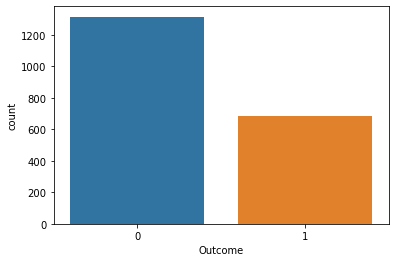

In [96]:
# plotting graph for output classes counts
sns.countplot(x = 'Outcome',data = dataset)

In [97]:
#Data Visualization

<AxesSubplot:>

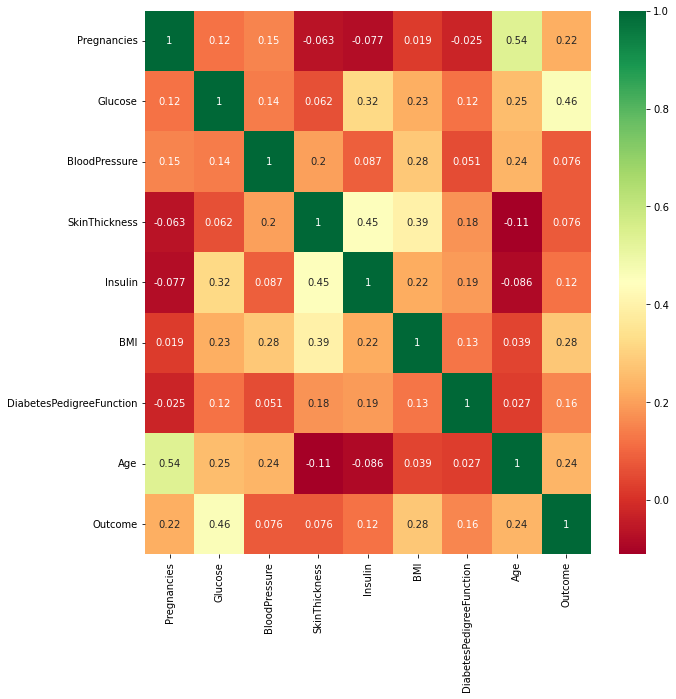

In [98]:
#correlation
plt.figure(figsize = (10,10))

sns.heatmap(dataset.corr(), annot =True,cmap="RdYlGn")

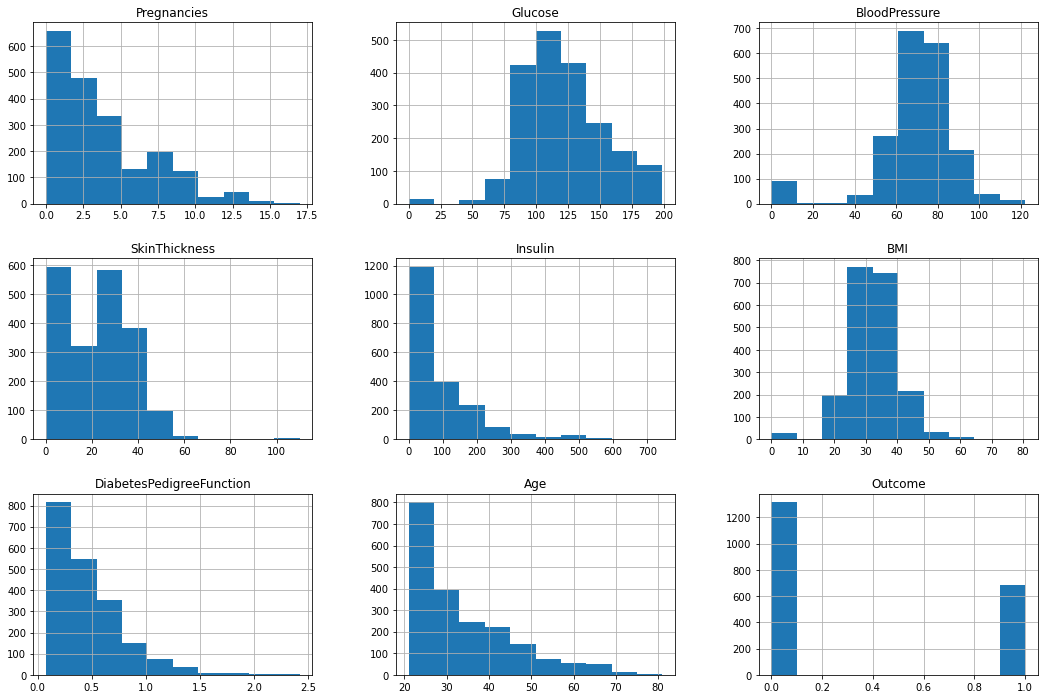

In [99]:
dataset.hist(figsize=(18,12))
plt.show()

In [100]:
# Model Training and Prediction

In [101]:
#train_test_splitting of the dataset

x = dataset.drop(columns = 'Outcome')

# Getting Predicting Value
y = dataset['Outcome']

from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [102]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1400, 8), (600, 8), (1400,), (600,))

In [103]:
print("Pregnancies: {0}".format(len(dataset.loc[dataset['Pregnancies'] == 0])))
print("Glucose: {0}".format(len(dataset.loc[dataset['Glucose'] == 0])))
print("bp: {0}".format(len(dataset.loc[dataset['BloodPressure'] == 0])))
print("SkinThickness: {0}".format(len(dataset.loc[dataset['SkinThickness'] == 0])))
print("Insulin: {0}".format(len(dataset.loc[dataset['Insulin'] == 0])))
print("BMI: {0}".format(len(dataset.loc[dataset['BMI'] == 0])))
print("DiabetesPedigreeFunction: {0}".format(len(dataset.loc[dataset['DiabetesPedigreeFunction'] == 0])))
print("Age: {0}".format(len(dataset.loc[dataset['Age'] == 0])))

Pregnancies: 301
Glucose: 13
bp: 90
SkinThickness: 573
Insulin: 956
BMI: 28
DiabetesPedigreeFunction: 0
Age: 0


In [104]:
#Filling in the 0 values present with the mean of that particular property

from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_values.fit_transform(x_train)
X_test = fill_values.fit_transform(x_test)

In [105]:
#NAIVE BAYES

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)

Classification Report is:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       398
           1       0.67      0.58      0.62       202

    accuracy                           0.76       600
   macro avg       0.74      0.72      0.73       600
weighted avg       0.76      0.76      0.76       600

Confusion Matrix:
 [[341  57]
 [ 85 117]]
Training Score:
 76.57142857142857
Mean Squared Error:
 0.23666666666666666


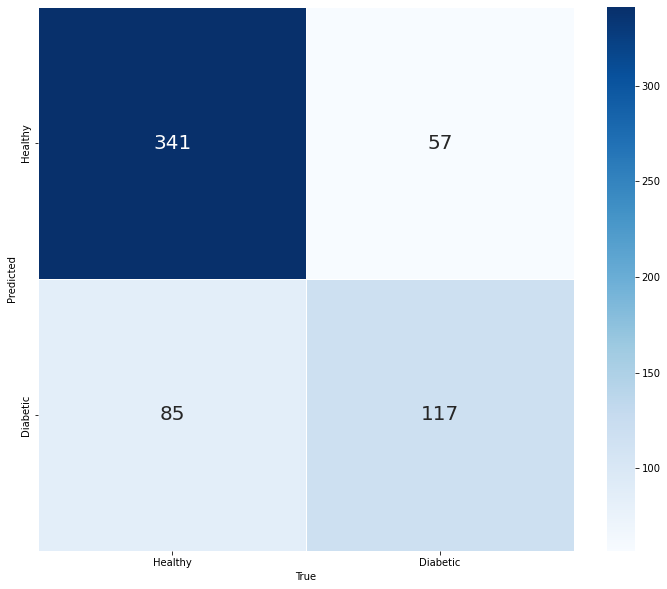

In [106]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
cf_matrix = confusion_matrix(y_test, y_pred)

print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",cf_matrix)
print("Training Score:\n",gnb.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))

df_cf_matrix = pd.DataFrame(cf_matrix, index=['Healthy', 'Diabetic'], columns=['Healthy', 'Diabetic'])
plt.figure(figsize = (12,10))
sns.heatmap(df_cf_matrix, linewidths=1, annot=True, fmt='g', cmap='Blues',annot_kws={"size": 20})

plt.xlabel('True')
a = plt.ylabel('Predicted')



In [107]:
print("Accuracy Score:\n",gnb.score(x_train,y_train)*100)

Accuracy Score:
 76.57142857142857


In [108]:
with open('nb.pkl', 'wb') as fid:
    cPickle.dump(gnb, fid)

In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

Classification Report is:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83       398
           1       0.66      0.67      0.66       202

    accuracy                           0.77       600
   macro avg       0.74      0.74      0.74       600
weighted avg       0.77      0.77      0.77       600

Confusion Matrix:
 [[327  71]
 [ 67 135]]
Training Score:
 84.71428571428572
Mean Squared Error:
 0.23
R2 score is:
 -0.02990198517339171


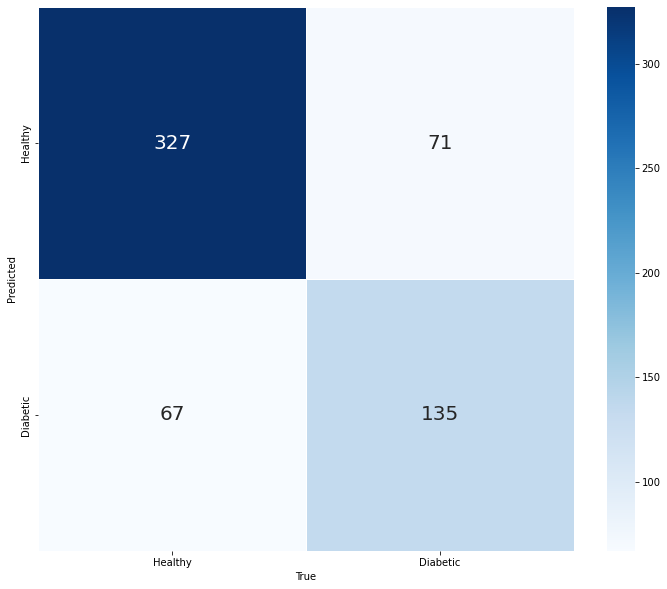

In [110]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
cf_matrix = confusion_matrix(y_test, y_pred)

print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

df_cf_matrix = pd.DataFrame(cf_matrix, index=['Healthy', 'Diabetic'], columns=['Healthy', 'Diabetic'])
plt.figure(figsize = (12,10))
sns.heatmap(df_cf_matrix, linewidths=1, annot=True, fmt='g', cmap='Blues',annot_kws={"size": 20})

plt.xlabel('True')
a = plt.ylabel('Predicted')


In [111]:
print(accuracy_score(y_test,y_pred)*100)

77.0


In [112]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

Classification Report is:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       398
           1       0.96      0.94      0.95       202

    accuracy                           0.97       600
   macro avg       0.97      0.96      0.96       600
weighted avg       0.97      0.97      0.97       600

Confusion Matrix:
 [[391   7]
 [ 12 190]]
Training Score:
 100.0
Mean Squared Error:
 0.03166666666666667
R2 score is:
 0.8582019005920692


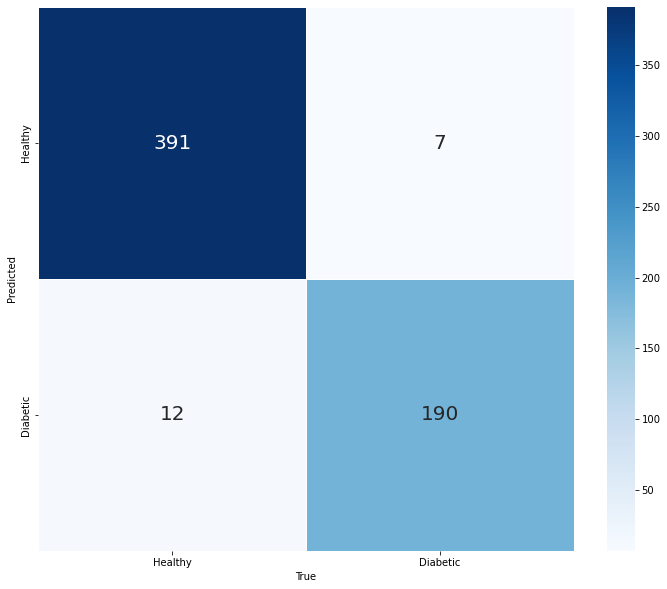

In [113]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
cf_matrix = confusion_matrix(y_test, y_pred)

print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

df_cf_matrix = pd.DataFrame(cf_matrix, index=['Healthy', 'Diabetic'], columns=['Healthy', 'Diabetic'])
plt.figure(figsize = (12,10))
sns.heatmap(df_cf_matrix, linewidths=1, annot=True, fmt='g', cmap='Blues',annot_kws={"size": 20})

plt.xlabel('True')
a = plt.ylabel('Predicted')

In [114]:
print(accuracy_score(y_test,y_pred)*100)

96.83333333333334


In [115]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rfc.predict_proba(X_test)
nb_probs = gnb.predict_proba(X_test)
knn_probs = knn.predict_proba(X_test)


In [116]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
knn_probs = knn_probs[:, 1]

In [117]:
from sklearn.metrics import roc_curve, roc_auc_score

In [118]:
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
knn_auc = roc_auc_score(y_test, knn_probs)

In [119]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('KNN : AUROC = %.3f' % (knn_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.974
Naive Bayes: AUROC = 0.837
KNN : AUROC = 0.794


In [120]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)

In [121]:
import matplotlib.pyplot as plt

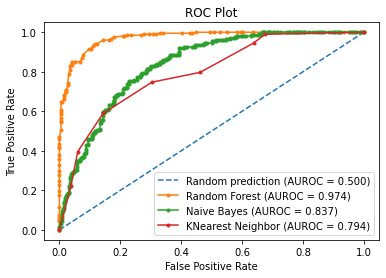

In [122]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNearest Neighbor (AUROC = %0.3f)' % knn_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()